# Installations and Imports

In [37]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [66]:
# Importing required libraries

import pandas as pd
import missingno as msno
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
import time

from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB



warnings.filterwarnings("ignore")

# Feature Exploration

In [67]:
# Viewing training dataset

train_data = pd.read_csv('/Users/aryashrinu/Desktop/weather_aus_training_data.csv')
train_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/08,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/08,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/08,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/08,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/08,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [68]:
# Viewing feature columns

column_names = train_data.columns
column_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [69]:
# Analyzing feature categories

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49424 entries, 0 to 49423
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           49424 non-null  object 
 1   Location       49424 non-null  object 
 2   MinTemp        49077 non-null  float64
 3   MaxTemp        49260 non-null  float64
 4   Rainfall       48809 non-null  float64
 5   Evaporation    22507 non-null  float64
 6   Sunshine       17707 non-null  float64
 7   WindGustDir    44878 non-null  object 
 8   WindGustSpeed  44885 non-null  float64
 9   WindDir9am     44383 non-null  object 
 10  WindDir3pm     47534 non-null  object 
 11  WindSpeed9am   48438 non-null  float64
 12  WindSpeed3pm   48167 non-null  float64
 13  Humidity9am    48702 non-null  float64
 14  Humidity3pm    48505 non-null  float64
 15  Pressure9am    41809 non-null  float64
 16  Pressure3pm    41858 non-null  float64
 17  Cloud9am       29478 non-null  float64
 18  Cloud3

## Findings:

### From the above, there is a mixture of categorical and numerical features. 

### Categorical features have the datatype as object and numerical features have the datatype as float64. 

### We see some of the features have missing values in the dataset.

In [70]:
# Viewing statistical properties of all features 

train_data.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,49424,49424,49077.000000,49260.000000,48809.000000,22507.000000,17707.000000,44878,44885.000000,44383,...,48505.000000,41809.000000,41858.000000,29478.000000,29033.000000,48881.000000,48652.000000,48809,49424.000000,49424
unique,2735,22,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,8/30/11,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,22,2718,NaN,NaN,NaN,NaN,NaN,3741,NaN,3650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37977,NaN,38420
mean,NaN,NaN,11.470699,22.403618,2.452183,5.271360,7.424233,NaN,39.854138,NaN,...,52.857664,1018.383312,1015.960340,4.531481,4.613819,16.065711,20.957741,NaN,2.469143,NaN
std,NaN,NaN,6.381146,6.919740,8.532466,4.093008,3.836154,NaN,14.232263,NaN,...,20.753841,7.039554,6.941918,2.909149,2.699023,6.129276,6.740999,NaN,8.558594,NaN
min,NaN,NaN,-8.500000,-4.100000,0.000000,0.000000,0.000000,NaN,7.000000,NaN,...,1.000000,980.500000,979.000000,0.000000,0.000000,-6.200000,-5.100000,NaN,0.000000,NaN
25%,NaN,NaN,6.900000,17.800000,0.000000,2.600000,4.600000,NaN,30.000000,NaN,...,38.000000,1013.600000,1011.200000,1.000000,2.000000,11.800000,16.600000,NaN,0.000000,NaN
50%,NaN,NaN,11.800000,22.100000,0.000000,4.400000,8.300000,NaN,39.000000,NaN,...,53.000000,1018.500000,1016.000000,5.000000,5.000000,16.500000,20.600000,NaN,0.000000,NaN
75%,NaN,NaN,16.600000,26.700000,0.600000,7.000000,10.400000,NaN,48.000000,NaN,...,67.000000,1023.200000,1020.700000,7.000000,7.000000,20.600000,25.100000,NaN,0.600000,NaN


In [71]:
# Exploring the frequency distribution of the target variable 'RainTomorrow'

train_data['RainTomorrow'].value_counts()/len(train_data)

No     0.777355
Yes    0.222645
Name: RainTomorrow, dtype: float64

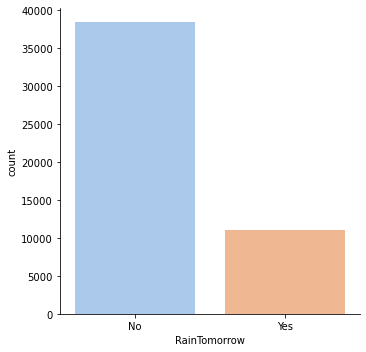

In [72]:
# Visualizing the frequency distribution of the target variable 'RainTomorrow'

import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x="RainTomorrow", kind="count", palette="pastel", data=train_data)

## Findings

### The above exploration confirms that 'No' class label occurs 77% and the 'Yes' occurs 22%.

### This indicates we are dealing with an unbalanced dataset. 

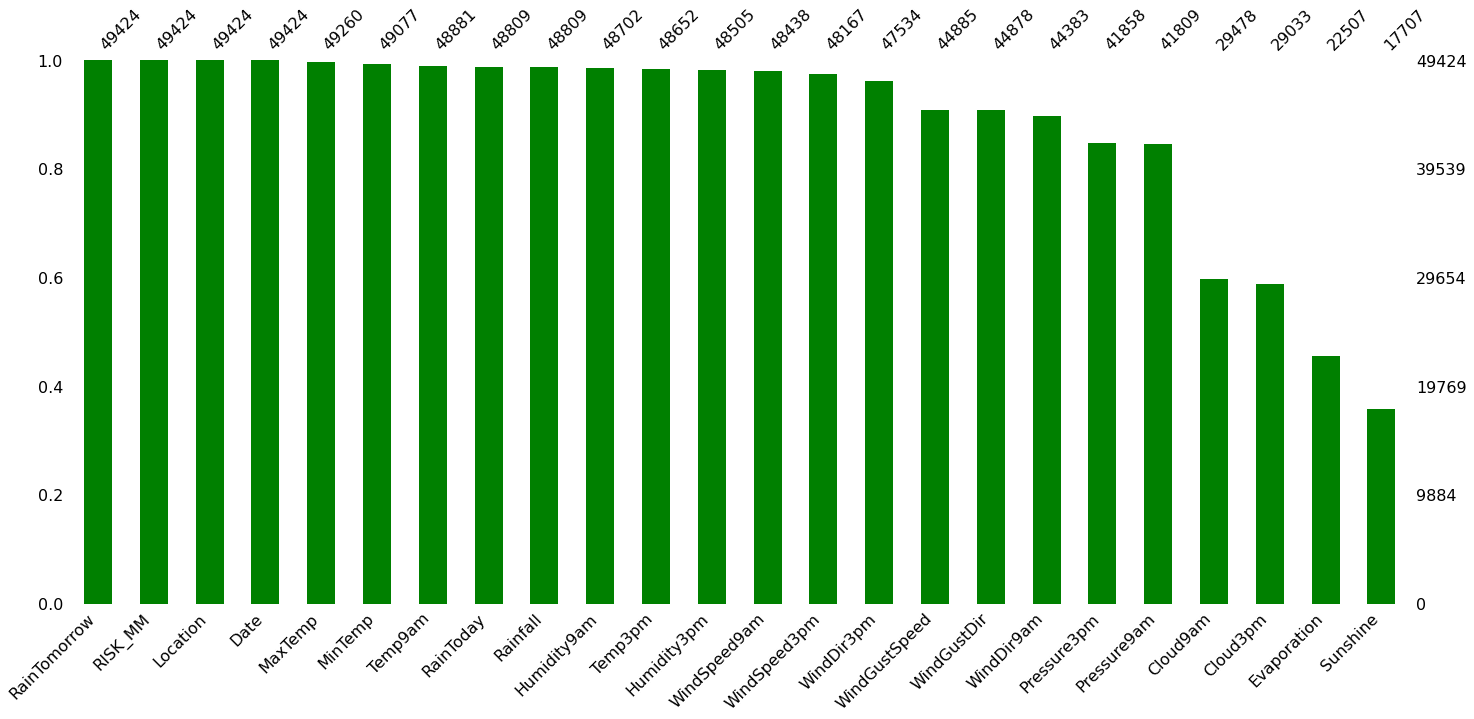

In [73]:
# Checking the missing data in the training dataset
 
msno.bar(train_data,sort='descending',color='green') 

In [74]:
# Exploring missing values
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,31717,0.641733
Evaporation,26917,0.544614
Cloud3pm,20391,0.412573
Cloud9am,19946,0.403569


# Feature Engineering

In [75]:
# "RainToday" and "RainTomorrow" features will be converted into binary (1/0)
# 1 represents "Yes"
# 0 represents "No"

train_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
train_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [76]:
# Check if the text to numeric class label conversion is successful

train_data['RainTomorrow'].value_counts()/len(train_data)

0    0.777355
1    0.222645
Name: RainTomorrow, dtype: float64

In [77]:
# The next step is to compute categorical columns with mode, and transform them into numerical values.

train_data.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [78]:
# Compute categorical var with Mode

train_data['Date'] = train_data['Date'].fillna(train_data['Date'].mode()[0])
train_data['Location'] = train_data['Location'].fillna(train_data['Location'].mode()[0])
train_data['WindGustDir'] = train_data['WindGustDir'].fillna(train_data['WindGustDir'].mode()[0])
train_data['WindDir9am'] = train_data['WindDir9am'].fillna(train_data['WindDir9am'].mode()[0])
train_data['WindDir3pm'] = train_data['WindDir3pm'].fillna(train_data['WindDir3pm'].mode()[0])

In [79]:
# Convert categorical features to continuous features with Label Encoding

lencoders = {}
for col in train_data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train_data[col] = lencoders[col].fit_transform(train_data[col])

In [80]:
# We will impute the missing values using mean statistical value. 

train_data.fillna(train_data.mean(), inplace=True)

train_data['RainTomorrow'].value_counts()/len(train_data)


0    0.777355
1    0.222645
Name: RainTomorrow, dtype: float64

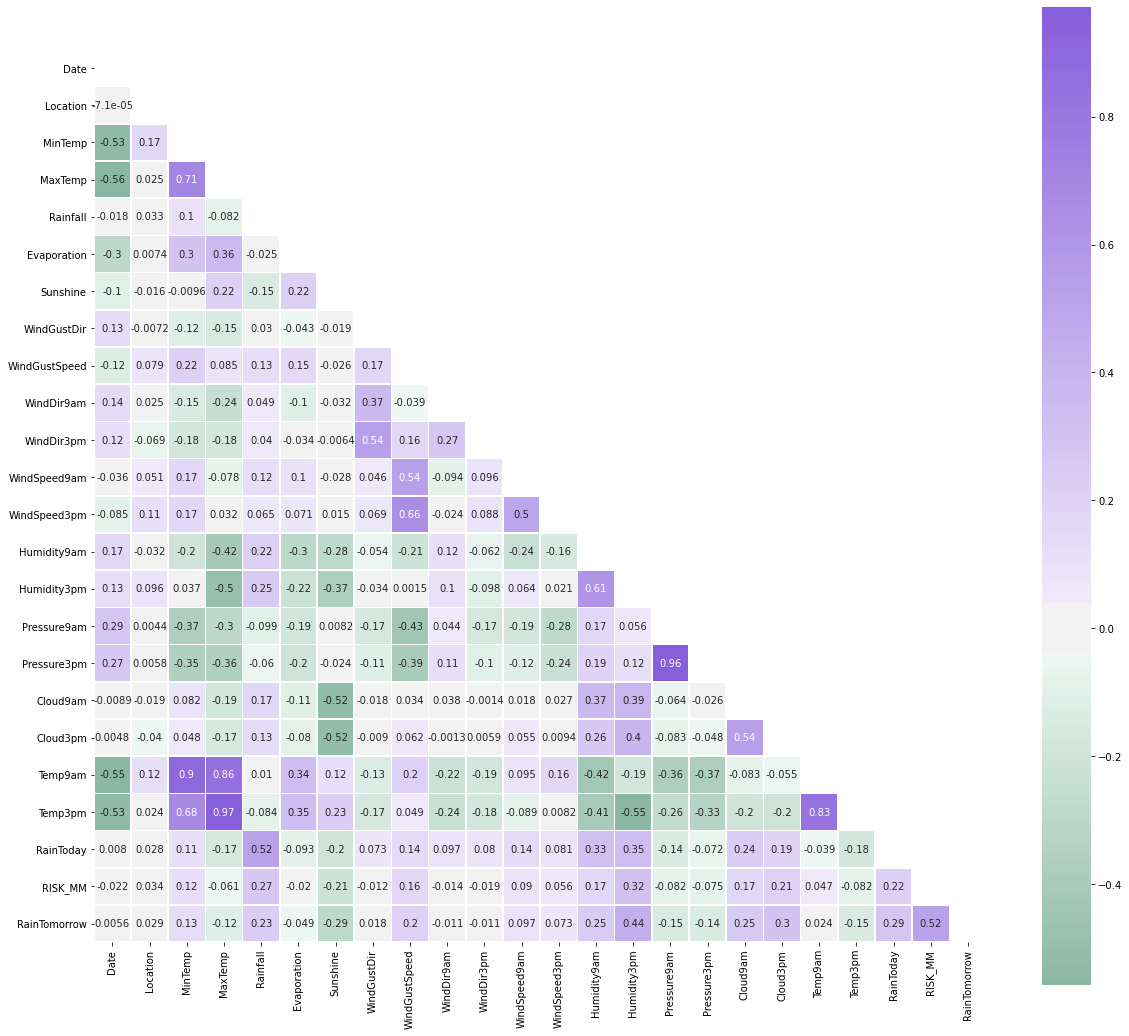

In [81]:
# Next step is to check if any feature is correlated highly with any other feature

# Correlation Heatmap

corr = train_data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})


## Findings

### Some of the pairs that have correlation are: Pressure9am and  Presssure3pm, Temp9am and Temp3pm, etc.

### Since none of the variables have same correlation, we are not discarding any features as every feature might add value to the training.

# Feature Selection

In [82]:
# Feature Selection by Fileter Method(Chi-Square Value)

# Standardize the data using MinMaxScaler instead of StandardScaler to avoid negative values

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train_data)

train_data = pd.DataFrame(r_scaler.transform(train_data), index=train_data.index, columns=train_data.columns)

#modified_data['Evaporation'].value_counts()/len(train_data)
#modified_data.head()

train_data['RainTomorrow'].value_counts()/len(train_data)

0.0    0.777355
1.0    0.222645
Name: RainTomorrow, dtype: float64

In [83]:
# Feature Importance using Filter Method (Chi-Square)

X = train_data.loc[:,train_data.columns!='RainTomorrow']
y = train_data[['RainTomorrow']]

selector = SelectKBest(chi2, k=11)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['MinTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
       'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


# Model Training

In [89]:
features = train_data[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = train_data['RainTomorrow']

# Split into test and train

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

print(len(y_train))

#from imblearn.over_sampling import SMOTE 
#sm = SMOTE(random_state = 42) 
#X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 

print(len(y_train))

# Normalize Features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

37068
37068


In [90]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='darkorange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [91]:

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Greens_r, normalize = 'all')
    
    return model, accuracy, roc_auc, time_taken

Accuracy = 0.8339268371641307
ROC Area under Curve = 0.6996648074834932
Time taken = 0.304689884185791
              precision    recall  f1-score   support

         0.0    0.85591   0.94449   0.89802      9566
         1.0    0.70500   0.45484   0.55294      2790

    accuracy                        0.83393     12356
   macro avg    0.78046   0.69966   0.72548     12356
weighted avg    0.82184   0.83393   0.82010     12356



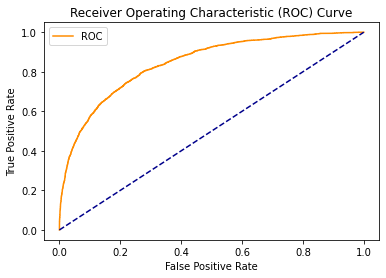

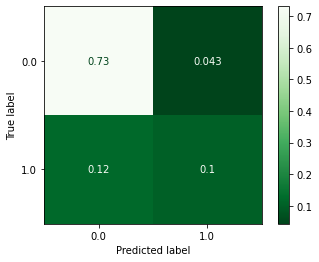

In [92]:
# Model 1 - Logistic Regression 
params_lr = {'penalty': 'l2', 'solver':'newton-cg'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.7680479119456135
ROC Area under Curve = 0.6759058553404119
Time taken = 0.16088604927062988
              precision    recall  f1-score   support

         0.0    0.85465   0.84393   0.84925      9566
         1.0    0.48694   0.50789   0.49719      2790

    accuracy                        0.76805     12356
   macro avg    0.67079   0.67591   0.67322     12356
weighted avg    0.77162   0.76805   0.76976     12356



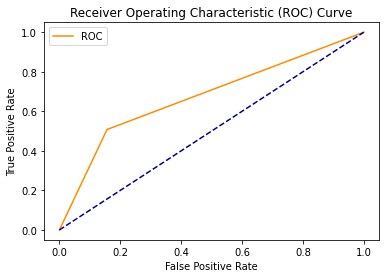

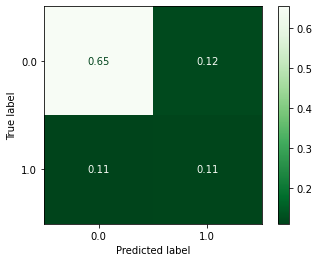

In [93]:
# Model 2 - Decision Tree

from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 32,
             'max_features': "log2"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.8000161864681127
ROC Area under Curve = 0.7119119986631267
Time taken = 0.04193425178527832
              precision    recall  f1-score   support

         0.0    0.86957   0.87257   0.87107      9566
         1.0    0.55785   0.55125   0.55453      2790

    accuracy                        0.80002     12356
   macro avg    0.71371   0.71191   0.71280     12356
weighted avg    0.79918   0.80002   0.79959     12356



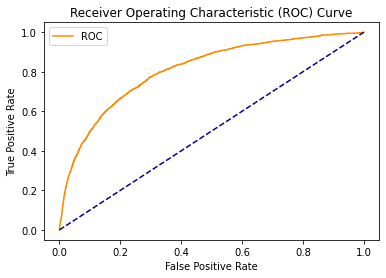

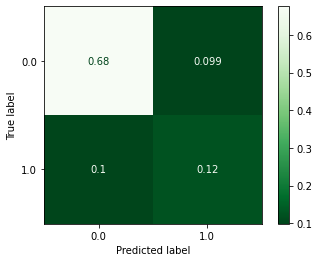

In [94]:
#Model 3 - Gaussian Naive Bayes

params_gnb = {
             'var_smoothing':1e-9}
model_gnb = GaussianNB(**params_gnb)
model_gnb, accuracy_gnb, roc_auc_gnb, tt_gnb = run_model(model_gnb, X_train, y_train, X_test, y_test)


In [95]:
# Model 3 - Gaussian Naive Bayes without parameters

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
prediction_y = gaussian.predict(X_test)
prediction_y =gaussian.predict(X_test)
X=accuracy_score(y_test, prediction_y)
print('test accuracy: %.5f' % X)

test accuracy: 0.80002


Accuracy = 0.831175137584979
ROC Area under Curve = 0.7204835374987729
Time taken = 40.55190110206604
              precision    recall  f1-score   support

         0.0    0.86789   0.92233   0.89428      9566
         1.0    0.66073   0.51864   0.58112      2790

    accuracy                        0.83118     12356
   macro avg    0.76431   0.72048   0.73770     12356
weighted avg    0.82112   0.83118   0.82357     12356



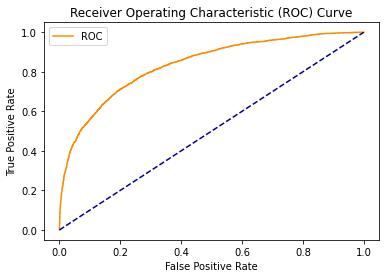

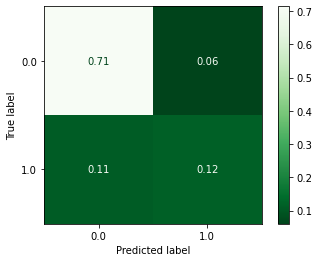

In [96]:
# Model 4 - Neural Network (Multilayer Perceptron)

from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'relu',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

In [99]:
# Applying 5 - fold cross validation for the decision tree model

# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_nn, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))


Cross-validation scores:[0.83072565 0.83234421 0.82600486 0.81815729 0.83083772]


In [100]:
# Find the Average Cross - Validation Score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8276


In [35]:
# From the above, CV does not improve the accuracy of the model. 

# References - https://www.kaggle.com/